# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [63]:
# To filter the warnings
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split


# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# To get diferent metric scores
from sklearn import metrics

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    roc_auc_score,
    roc_curve,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    precision_recall_curve,
    make_scorer,
)

# this will help in making the Python code more structured automatically (good coding practice)
%reload_ext nb_black

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [64]:
# loading the dataset
data = pd.read_csv("INNHotelsGroup.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [65]:
# checking the shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")  # f-string

There are 36275 rows and 19 columns.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [66]:
# To view a sample of the data
data.sample(
    20, random_state=1
)  # setting the random_state ensures we get the same results every time

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
30392,INN30393,1,0,1,0,Not Selected,0,Room_Type 1,53,2018,9,11,Online,0,0,0,94.32,0,Not_Canceled
6685,INN06686,2,0,1,2,Meal Plan 1,0,Room_Type 1,63,2018,4,22,Online,0,0,0,105.30,1,Canceled
8369,INN08370,2,0,2,3,Meal Plan 1,0,Room_Type 4,55,2018,9,11,Online,0,0,0,106.24,0,Not_Canceled
2055,INN02056,2,0,0,2,Not Selected,0,Room_Type 1,53,2017,12,29,Online,0,0,0,81.00,1,Not_Canceled
10969,INN10970,1,0,2,4,Meal Plan 1,0,Room_Type 1,245,2018,7,6,Offline,0,0,0,110.00,0,Canceled
24881,INN24882,2,0,3,7,Meal Plan 1,0,Room_Type 2,231,2018,8,1,Online,0,0,0,81.82,2,Canceled
28658,INN28659,2,0,0,3,Meal Plan 2,0,Room_Type 1,71,2018,5,10,Offline,0,0,0,126.00,1,Not_Canceled
20853,INN20854,2,0,1,2,Meal Plan 1,0,Room_Type 1,66,2017,10,9,Offline,0,0,0,75.00,0,Canceled
8501,INN08502,2,0,0,3,Meal Plan 1,0,Room_Type 2,40,2018,1,14,Online,0,0,0,77.55,1,Not_Canceled
1942,INN01943,2,0,0,2,Meal Plan 1,0,Room_Type 1,63,2018,8,9,Online,0,0,0,144.90,2,Not_Canceled


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Observations
A quick glance at the above sample data suggests below patterns 
- Most of the bookings are for 2 adults and no children.
- There are more number of week nights than weekend nights.
- Meal Plan 1 is preferred choice of meal than others. There are few bookings where meal plan is not selected.
- Most of the bookings are without car park request.
- Majority bookings are against Room Type 1.
- Online is the most used channel for bookings.
- Arrival_month suggests that most of the reservations are during spring and summer season, the preferred season for leisure travel. 
- There are very few returning / repeat customers. 

In [67]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [68]:
# checking for duplicate values in the data
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Observations
There are no duplicate values in the dataset.

In [69]:
# checking missing values in the data
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Observations
There are no missing values in the dataset.

In [70]:
# checking column datatypes and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Observations
Booking_ID, type_of_meal_plan, room_type_reserved, market_segment_type, booking_status are of type object. All other columns in the dataset are numeric. 

In [71]:
# Let's drop Booking_ID since it's a unique identifier and would have no impact on the prediction capability of the model, or in data analysis

df.drop("Booking_ID", axis=1, inplace=True)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [72]:
# Check the dataset after dropping the column
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Checking the unique values in object columns

In [73]:
df["type_of_meal_plan"].value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Observations
- Meal Plan 1 is the most preferred choice of meal.
- Quite a few bookings have no meal plans selected.

In [74]:
df["room_type_reserved"].value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Observations
- Room_Type 1 tops the chart as perferred room type for INN Hotels while Room_Type 3 sits at the bottom. 


In [75]:
df["market_segment_type"].value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Observations
- Online is the most common channel / market segment for bookings, followed by offline. There are few corporate bookings.


In [76]:
df["booking_status"].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Observations
- Close to 67% bookings are not cancelled.


In [77]:
# Lets convert the columns with an 'object' datatype into categorical variables
for column in df.columns:  # Loop through all columns in the dataframe
    if df[column].dtype == "object":  # Only apply for columns with type object
        df[column] = df[column].astype("category")  # convert to category
df.head(10)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [78]:
# Checking the statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Observations
* `no_of_adults` ranges from 0 to 4. Mean and median value indicates that majority bookings are with 2 adults. 
* `no_of_children` ranges from 0 to 10. Mean and median value indicates that majority bookings are with no children.
* `no_of_weekend_nights` ranges from 0 to 10 whereas `no_of_week_nights` ranges from 0 to 17. There is a good difference between 75th percentile and maximum value of `no_of_week_nights` which is an indication of outliers. 
* Minimum value for most of the columns are 0
* `arrival_year` indicates that the dataset contains bookings made between 2017 and 2018
* `lead time` data appear to be right skewed. Mean lead time is greater than median. There is a big difference between 75th percentile and maximum value which is an indication of outliers.
* Min value for `avg_price_per_room` is 0. There are bookings with no price charged. There is a big difference between 75th percentile and maximum value , 25th percentile and minimum value which is an indication of outliers.
* `no_of_previous_cancellations` goes as high as 13. These could be customers who are likely to cancel again. 


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

## Univariate analysis

In [79]:
# Function to plot distribution plot and box plot as subplots in one row.
# This will be a resuable for univariate analysis of different variables of df dataframe


def distribution_box_plot(
    data, series, kde=False, mean=False, median=False, mode=False
):
    """
    Distplot and boxplot as subplots for a series within a dataframe
    data =  Dataframe
    series = column / variable under analysis
    kde =  Boolean. To show Kernel Density Estimate curve. Default set to False
    mean =  Boolean. To show mean value of a numeric series. Default set to False
    median = Boolean. To show median of a numeric series. Default set to False
    mode = Boolean. To show first mode value of a numeric series. Default set to False
    """
    plt.figure(figsize=(20, 5))
    plt.subplot(
        1, 2, 1
    )  # Divides the plot area into subplots with 1 row and 2 columns. 3rd arg indicates plot index
    sns.histplot(data[series], kde=kde)  # Add distribution plot
    if mean == True:  # Add mean indicator to the distplot
        plt.axvline(data[series].mean(), color="r", linestyle="--", label="Mean")
    if median == True:  # Add median indicator to the distplot
        plt.axvline(data[series].median(), color="g", linestyle="-", label="Median")
    if mode == True:  # Add first modal value indicator to the distplot
        plt.axvline(data[series].mode()[0], color="b", linestyle="-", label="Mode")

    plt.legend()  # Show legends

    plt.subplot(1, 2, 2)
    sns.boxplot(
        data=data, y=series, showmeans=True
    )  # Add box plot with mean value indicator
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [80]:
# Function to plot labelled countplot with percentage and count over the bars
# This will be a resuable for univariate analysis of different variables / columns within df dataframe


def labelled_countplot(data, series, showper=True, showcount=True, n=None):
    """
    data = Dataframe
    series = column / variable under analysis
    showper = Boolean. To show percentage over the bars.Default set to True
    showcount = Boolean. To show count over the bars.Default set to True
    n = number of top records to plot
    """
    count = data[series].nunique()  # get the number of unique values of the column
    if n is None:
        plt.figure(
            figsize=(count + 3.5, 7)
        )  # Adjust the width of the graph area as per the unique values
    else:
        plt.figure(
            figsize=(n + 5, 5)
        )  # Adjust the width of the graph area as per the n value specified

    # Show countplot of the data in descending order of value count
    ax = sns.countplot(
        x=data[series], order=data[series].value_counts(ascending=False).index[:n]
    )

    # If True, show count as data label over each bar
    if showcount == True:
        for p, label in zip(
            ax.patches, data[series].value_counts(ascending=False).values
        ):
            ax.annotate(label, (p.get_x() + 0.100, p.get_height() + 3.5))

    # If True, show percentage as data label over each bar
    if showper == True:
        total = data[series].count()
        for p, label in zip(
            ax.patches, 100 * data[series].value_counts(ascending=False).values / total
        ):
            ax.annotate(
                "({:.2f}%)".format(label), (p.get_x() + 0.350, p.get_height() + 3.5)
            )

    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**`avg_price_per_room`**

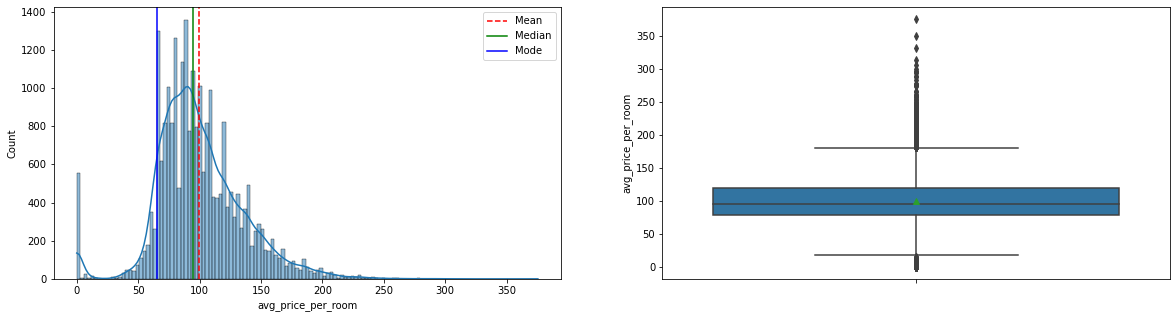

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [81]:
distribution_box_plot(
    df[df["booking_status"] == "Not_Canceled"],
    "avg_price_per_room",
    kde=True,
    mean=True,
    median=True,
    mode=True,
)

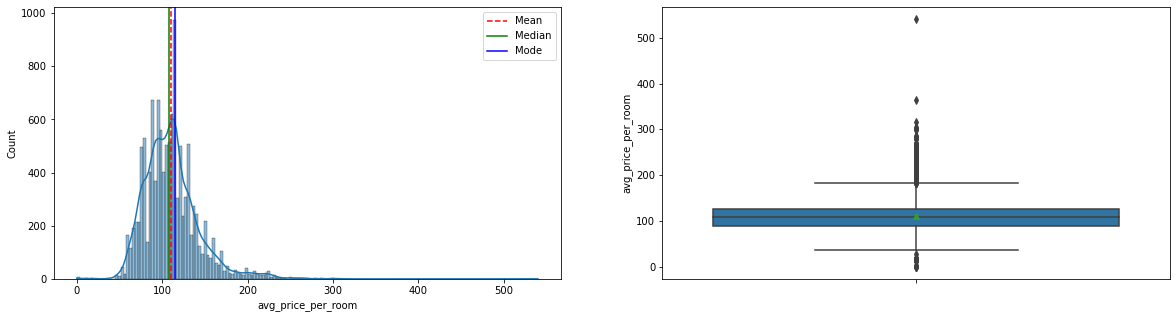

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [82]:
distribution_box_plot(
    df[df["booking_status"] == "Canceled"],
    "avg_price_per_room",
    kde=True,
    mean=True,
    median=True,
    mode=True,
)

#### Observations
* The data is right skewed for both cancelled and not cancelled booking status.
* There are quite a few outliers in both categories, particularly above the 3rd quartile. 
* Within cancelled bookings, the mode is to the right of mean and median. It shows that most of the cancelled bookings are where the avg_price_per_room is greater than 100 euros. 
* There are bookings with avg_price_per_room = 0. It needs further analysis. 

**`lead_time`**

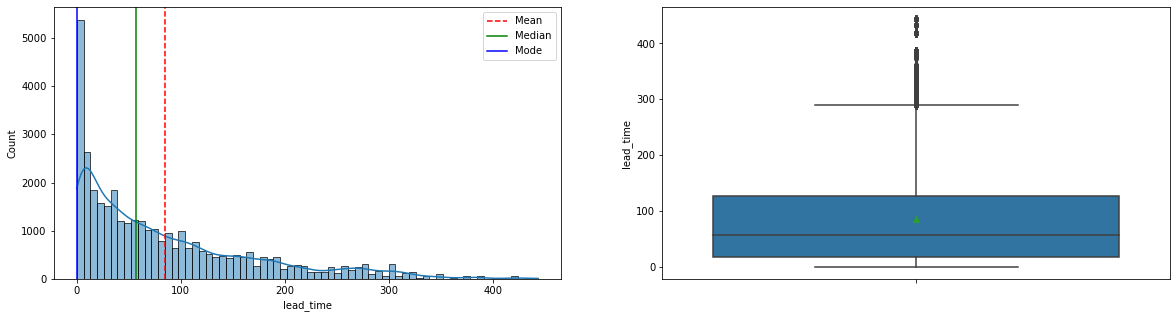

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [83]:
distribution_box_plot(
    df, "lead_time", kde=True, mean=True, median=True, mode=True,
)

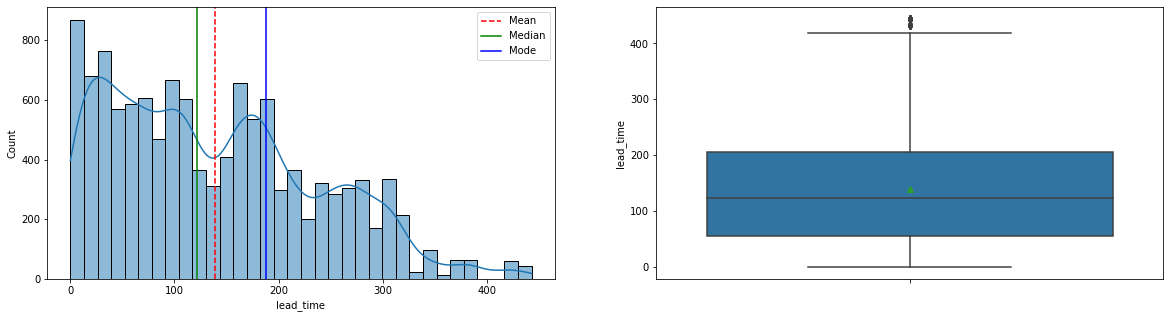

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [84]:
distribution_box_plot(
    df[df["booking_status"] == "Canceled"],
    "lead_time",
    kde=True,
    mean=True,
    median=True,
    mode=True,
)

#### Observations
* The overall distribution is heavily right skewed. 
* Most of the bookings have lead time 0 in the overall dataset. However, canceled bookings have a lead time of more than 100 days 
* There are outliers above 3rd quartile in the data. Very few outliers within cancelled category. 
* The lead time goes as high as 400 days. 

**`arrival_date`**

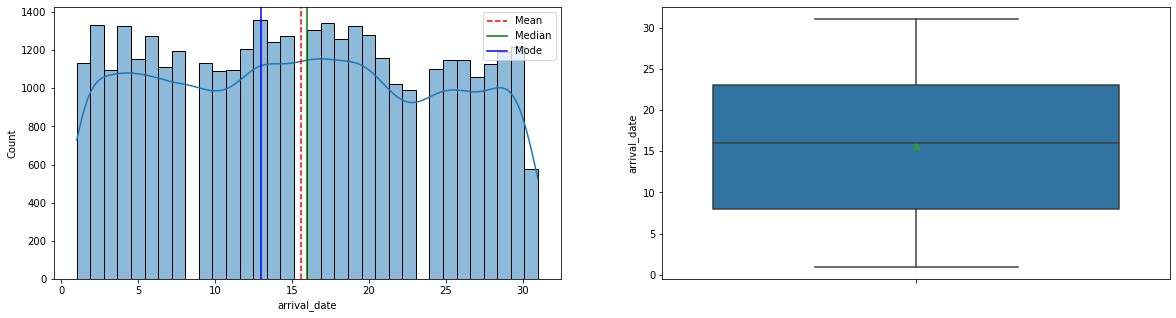

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [85]:
distribution_box_plot(df, "arrival_date", kde=True, mean=True, median=True, mode=True)

#### Observations
* The distribution is uniform. There are bookings on almost all days of a month. 

**`no_of_previous_cancellations`**

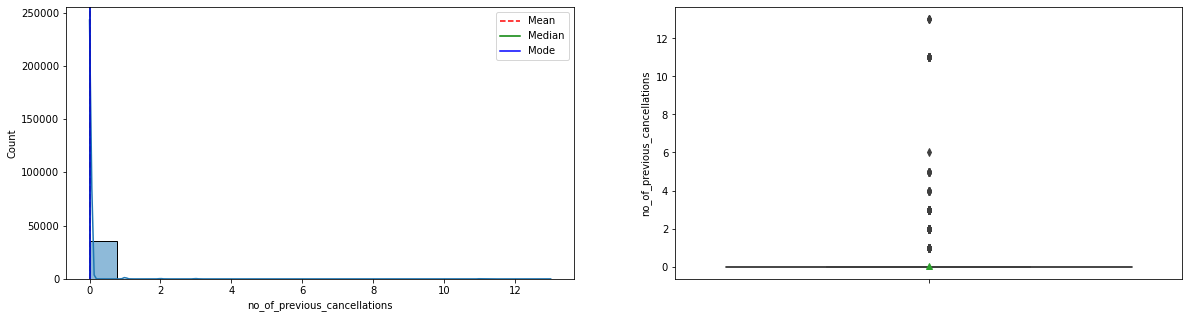

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [86]:
distribution_box_plot(
    df, "no_of_previous_cancellations", kde=True, mean=True, median=True, mode=True
)

#### Observations
* Almost all bookings have 0 previous cancellations. There are few outliers in the data. 

**`no_of_previous_bookings_not_canceled`**

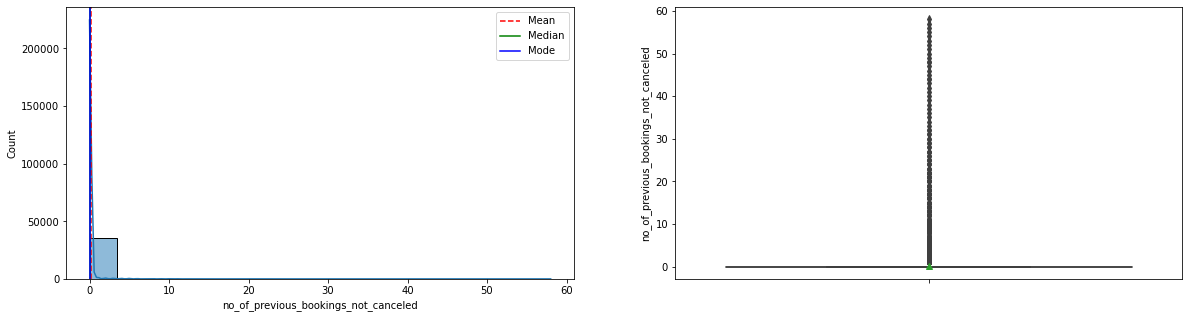

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [87]:
distribution_box_plot(
    df,
    "no_of_previous_bookings_not_canceled",
    kde=True,
    mean=True,
    median=True,
    mode=True,
)

#### Observations
* Majority bookings have 0 previous bookings that weren't cancelled. There are quite a few outliers in the data.

**`Discreet columns`**

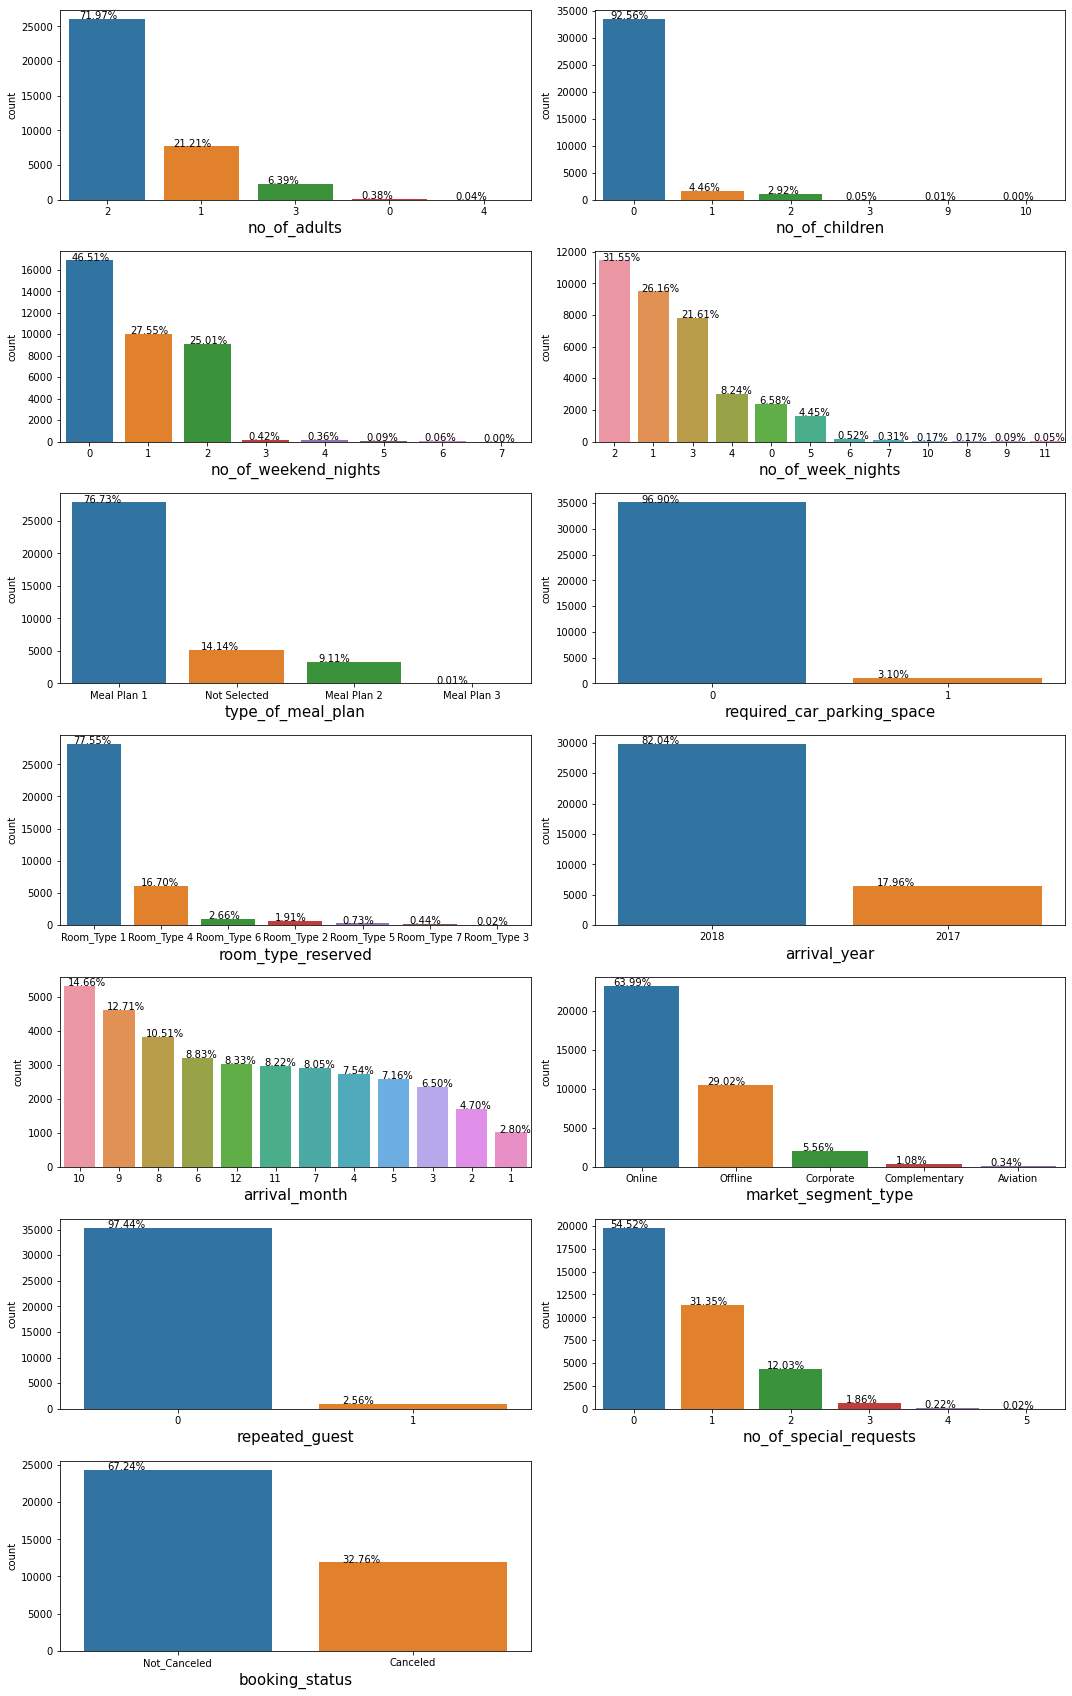

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [88]:
discreet_cols = [
    "no_of_adults",
    "no_of_children",
    "no_of_weekend_nights",
    "no_of_week_nights",
    "type_of_meal_plan",
    "required_car_parking_space",
    "room_type_reserved",
    "arrival_year",
    "arrival_month",
    "market_segment_type",
    "repeated_guest",
    "no_of_special_requests",
    "booking_status",
]

plt.figure(figsize=(15, 50))

for i in range(len(discreet_cols)):
    plt.subplot(15, 2, i + 1)
    ax = sns.countplot(
        data=df,
        x=discreet_cols[i],
        order=df[discreet_cols[i]].value_counts(ascending=False).index[:12],
    )
    total = df[discreet_cols[i]].count()
    for p, label in zip(
        ax.patches,
        100 * df[discreet_cols[i]].value_counts(ascending=False).values / total,
    ):
        ax.annotate("{:.2f}%".format(label), (p.get_x() + 0.100, p.get_height() + 4.5))

    plt.tight_layout()
    plt.xlabel(discreet_cols[i], fontsize=15)

plt.show()

### Observations
* 72% bookings have `no_of_adults` 2. There are very few bookings (less than 1%) with 4 adults. 
* 93% of all bookings are without `children`. There are 4% with 1 children and 3% with 2. There are few with 9 and 10 childrens which looks unusual and needs further analysis. 
* Almost 50% bookings are not for `weekend nights`. Nearly 25% of the bookings are for 1 and 2 weekend nights. The data goes as far as 7 weekend nights. 
* 32% of the bookings have 2 `week nights`. There are less 1 % bookings for more than 5 week nights.
* `Meal_Plan_1` is the most preferred choice of meal. There are 14% bookings where meal plan is not selected. 
* Almost all bookings are without `car park request`.
* Most of the bookings are against `Room_type_1`. There are some against Room_type 4. 
* 82% bookings are of year 2018. 
* `arrival_month` data suggests that **October is the busiest month for the hotel, followed by September and August**. There are least bookings in the month of Jan and Feb. 
* `market_segment_type` shows that 63% bookings were made online, followed by offline and corporate. Less than 1% bookings are of Aviation. **Most of the guests come from Online market segment.**
* `repeated_guest` shows that almost all bookings are with new guests. 
* Almost 50% of bookings are with no special requests. 32% bookings are with 1 special request. 
* `booking_status` shows that 67% bookings are not canceled, and **33% of the bookings were canceled**.

## Bivariate analysis

**Encode booking_status to Not_Canceled = 0, Canceled = 1.**

In [89]:
df["booking_status"].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [90]:
df["booking_status"] = df["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [91]:
df["booking_status"].value_counts()

0    24390
1    11885
Name: booking_status, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [92]:
df["booking_status"] = df["booking_status"].astype("int64")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

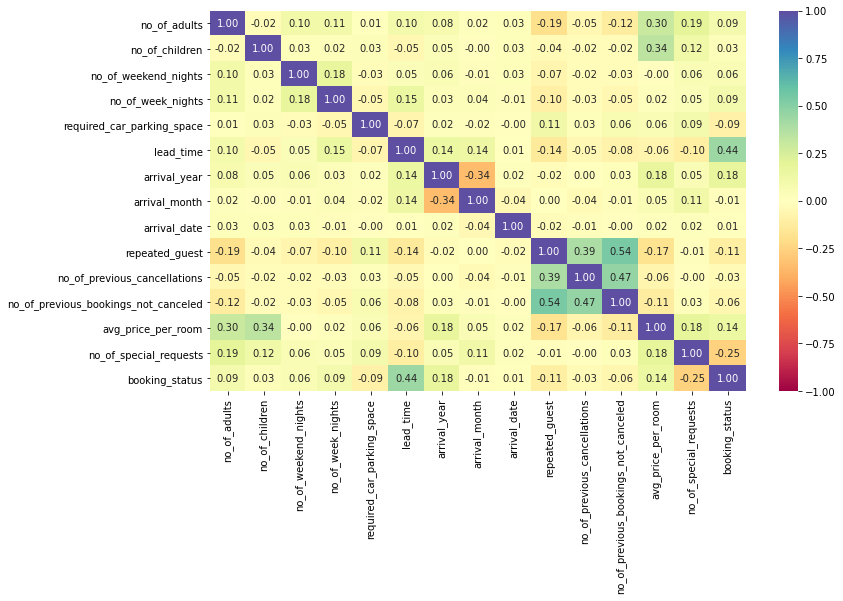

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [93]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

### Observations
* `booking_status` shows high positive correlation with `lead_time`, moderate correlation with `avg_price_per_room` and `arrival_year`
* `booking_status` shows high negative correlation with no_of_special_requests, moderate negative correlation with `repeated_guest`
* average_price_per_room shows positive correlation with `no_of_adults` and `no_of_children`

**`lead_time` Vs `booking_status`**

<AxesSubplot:xlabel='booking_status', ylabel='lead_time'>

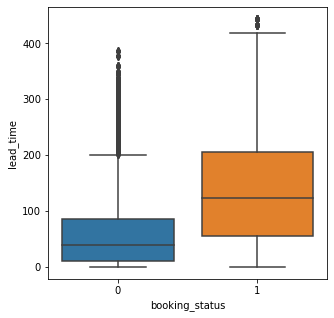

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [94]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=df, y="lead_time", x="booking_status")

### Observations
* The lead time appears to be more for canceled bookings. It goes as high as 400 days in advance. 
* Bookings that are not canceled have lesser lead time, which indicates a more firm travel plan of guests near the date. 

In [95]:
def stacked_barchart(data, predictor, target):
    """
    Create a contingency table and plot a stacked bar chart between the two categorical variables

    data: dataframe
    predictor: independent variable
    target: dependent variable
    """
    crosstab = pd.crosstab(index=data[target], columns=data[predictor])
    print(crosstab)
    crosstab.plot(kind="bar", stacked=True, figsize=(data[predictor].nunique() + 5, 5))
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?**

**`avg_price_per_room by market_segment_type` across `booking_status`**

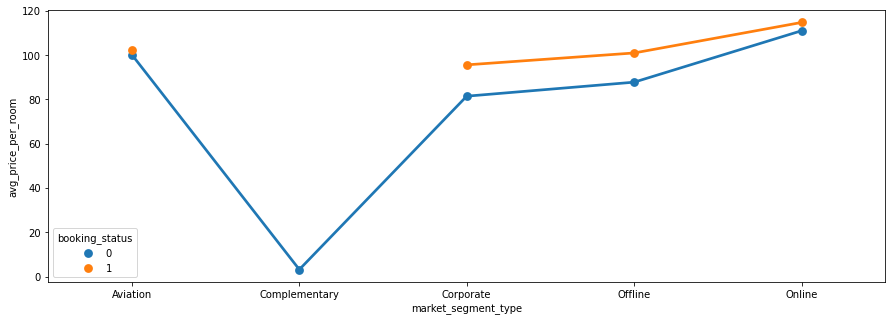

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [96]:
plt.figure(figsize=(15, 5))

ax = sns.pointplot(
    data=df,
    x="market_segment_type",
    y="avg_price_per_room",
    hue="booking_status",
    kind="line",
    ci=None,
    sort=True,
)
plt.show()

### Observations
* `avg_price_per_room` is highest for `market_segment_type` **Online** , followed by Aviation, Offline and Corporate across Canceled and Not_Canceled bookings.
* Complementary bookings have room price 0 which is expected. 
* There are no cancelled bookings in Complementary segment.

**`avg_price_per_room by booking_status`**

<AxesSubplot:xlabel='booking_status', ylabel='avg_price_per_room'>

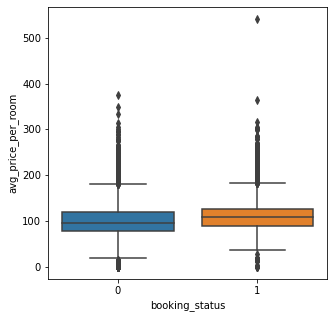

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [97]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=df, y="avg_price_per_room", x="booking_status")

### Observations
* Canceled bookings (1) have slightly higher avg_price_per_room than Not_Canceled (0).
* There are less outliers in Canceled category than Not_Canceled.
* The maximum price of the room goes above 500 euros in Cancelled category, and upto 400 euros in Not_Canceled.

**Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?**

**`avg_price_per_room by no_of_special_requests and booking_status`**

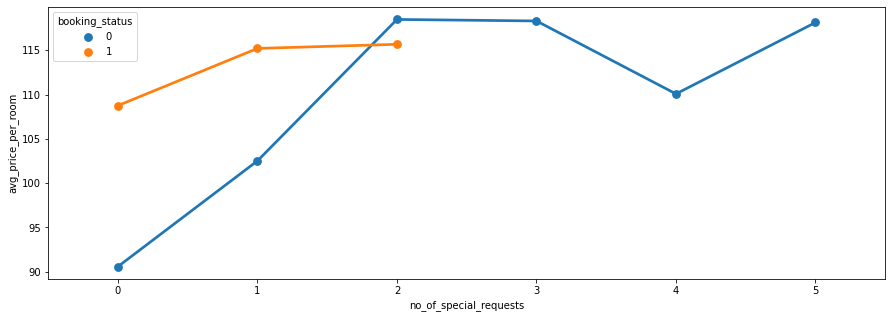

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [98]:
plt.figure(figsize=(15, 5))

ax = sns.pointplot(
    data=df,
    x="no_of_special_requests",
    y="avg_price_per_room",
    hue="booking_status",
    kind="line",
    ci=None,
    sort=True,
)
plt.show()

### Observations
* `Avg_price_per_room` tends to increase with increasing `no_of_special_requests`. 
* The maximum number of `no_of_special_requests` with Canceled (1) category is 2
* **It's not quite evident from the graph how `no_of_special_requests` affects cancelations.**

no_of_special_requests      0     1     2    3   4  5
booking_status                                       
0                       11232  8670  3727  675  78  8
1                        8545  2703   637    0   0  0


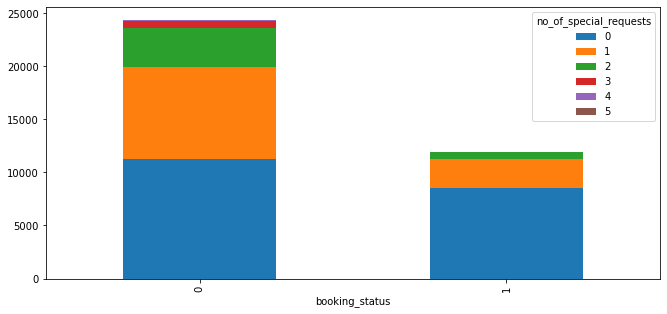

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [99]:
stacked_barchart(df, "no_of_special_requests", "booking_status")

### Observations
* In both Canceled and Not_Canceled category, most of the bookings have 0 `no_of_special_requests`. The proportion of  `no_of_special_requests` is nearly similar in both categories, which indicates the two variables are not highly correlated.

**`market_segment_type by booking_status`**

market_segment_type  Aviation  Complementary  Corporate  Offline  Online
booking_status                                                          
0                          88            391       1797     7375   14739
1                          37              0        220     3153    8475


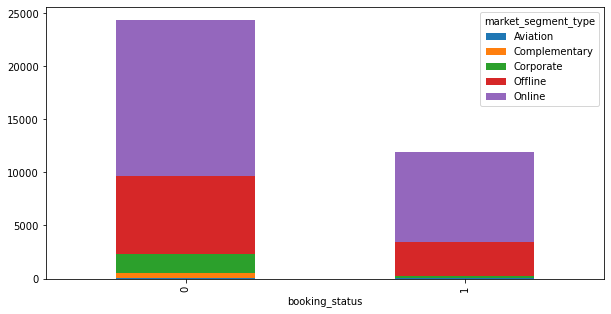

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [100]:
stacked_barchart(df, "market_segment_type", "booking_status")

### Observations
* **Online** dominates as `market_segment_type` in both Canceled and Not_Canceled bookings, followed by Offline.
* The proportion of `market_segment_type` is nearly similar in both categories, which indicates the two variables are not highly correlated.
* There are no canceled Complementary bookings.

**`avg_price_per_room by arrival_month and booking_status`**

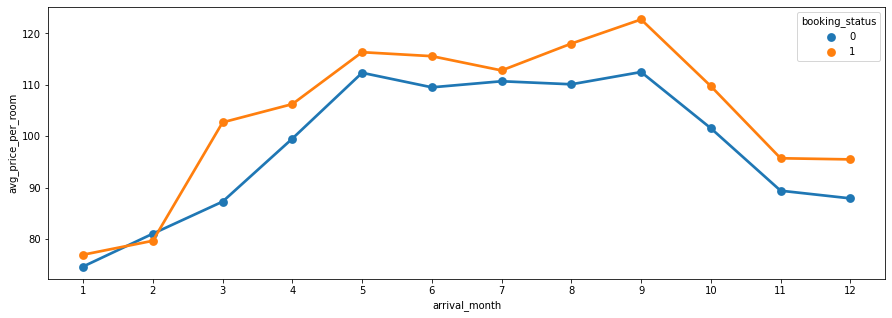

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [101]:
plt.figure(figsize=(15, 5))

ax = sns.pointplot(
    data=df,
    x="arrival_month",
    y="avg_price_per_room",
    hue="booking_status",
    kind="line",
    ci=None,
    sort=True,
)
plt.show()

### Observations
* `avg_price_per_room` tends to increase during spring (April-June) and Summer (July-September).
* Prices tend to drop during winter (November - February)
* Above graph suggests that Canceled(1) bookings have higher price than Not_Canceled(0). 

**booking_status by families with children (no_of_adults >=1 and no_of_children >=1)**

total_guests    2     3    4   5   10  11  12
booking_status                               
0               67  1020  501  10   1   0   1
1               23   535  395   5   0   1   0


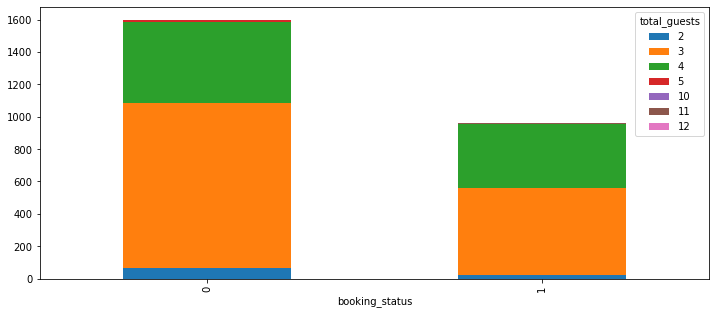

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [102]:
tot_guests = df[(df["no_of_adults"] >= 1) & (df["no_of_children"] >= 1)]
tot_guests["total_guests"] = tot_guests["no_of_adults"] + tot_guests["no_of_children"]
stacked_barchart(tot_guests, "total_guests", "booking_status")

### Observations
* Bookings with family, most of the families are of 3 guests in both Canceled and Not_Canceled category. The proportion of  `total_guests` is nearly similar in both categories, which indicates the two variables are not highly correlated. 

**booking_status by no_of_weekend_nights and no_of_week_nights**

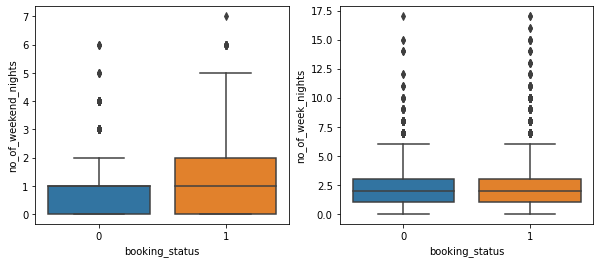

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [103]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df, x="booking_status", y="no_of_weekend_nights")

plt.subplot(122)
sns.boxplot(data=df, x="booking_status", y="no_of_week_nights")

plt.show()

### Observations
* Most of the bookings have 0 to 1 weekend nights. Some of the canceled bookings have upto 2 weekend nights of booking.
* no of week nights shows similar distribution across Canceled and Not Canceled. There are few outliers above 3rd quartile.

**Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?**

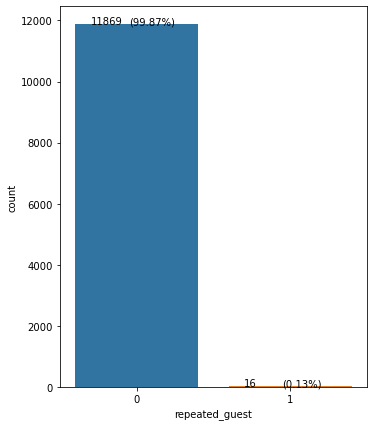

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [104]:
labelled_countplot(
    df[df["booking_status"] == 1], "repeated_guest", showper=True, showcount=True
)

### Observations
* **Less than 1% of `repeated_guest` have canceled their booking.**

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

**`Missing Value Treatment`**

In [105]:
# Make a copy of the data
df1 = df.copy()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [106]:
df1.shape

(36275, 18)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [107]:
# Check missing values
df1.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**no_of_adults**

There are no missing values as such in the data. But we saw earlier that the minimum value for `no_of_adults` and `no_of_children` are 0. Let's analyse if there are any bookings where both no_of_adults and no_of_children are 0, or where there are children but no adults. 

In [108]:
df1["no_of_adults"].value_counts()

2    26108
1     7695
3     2317
0      139
4       16
Name: no_of_adults, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [109]:
df1[(df1["no_of_adults"] == 0) & (df1["no_of_children"] == 0)]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

It's good that there are no bookings where both are 0. 

In [110]:
df1[(df1["no_of_adults"] == 0) & (df1["no_of_children"] >= 1)][
    "booking_status"
].value_counts()

0    95
1    44
Name: booking_status, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

There are 139 bookings where childrens are not accompained by any adult. 30% of such bookings have been cancelled. Hotels do not generally allow bookings with only children. Minimum 1 adult is mandatory. 
Let's substitute no_of_adults = 1 where no_of_adults = 0

In [111]:
df1["no_of_adults"] = df1["no_of_adults"].apply(lambda x: 1 if x == 0 else x)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [112]:
df1["no_of_adults"].value_counts()

2    26108
1     7834
3     2317
4       16
Name: no_of_adults, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

There are no more bookings without any adults.

**no of nights**

In [113]:
df1[(df1["no_of_weekend_nights"] == 0) & (df1["no_of_week_nights"] == 0)][
    "booking_status"
].value_counts()

0    76
1     2
Name: booking_status, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

These look like invalid entries since a booking should have data against at least one of the two columns. Let's drop these rows. 

In [114]:
df1 = df1.drop(
    df1[(df1.no_of_weekend_nights == 0) & (df1.no_of_week_nights == 0)].index
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [115]:
df1[(df1["no_of_weekend_nights"] == 0) & (df1["no_of_week_nights"] == 0)]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [116]:
df1.shape

(36197, 18)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

There are no more rows where both number of weekend nights and weekday nights are 0

**`Outlier Treatment`**

**no_of_children**

We saw earlier that there are bookings with number of children as high as 9 or 10. Let's look at the unique values.

In [117]:
df1["no_of_children"].value_counts()

0     33504
1      1615
2      1056
3        19
9         2
10        1
Name: no_of_children, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

This looks a bit unrealistic. Let's replace 9 and 10 with more realistic value of 3. 

In [118]:
df1["no_of_children"] = df1["no_of_children"].replace([9, 10], 3)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [119]:
df1["no_of_children"].value_counts()

0    33504
1     1615
2     1056
3       22
Name: no_of_children, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

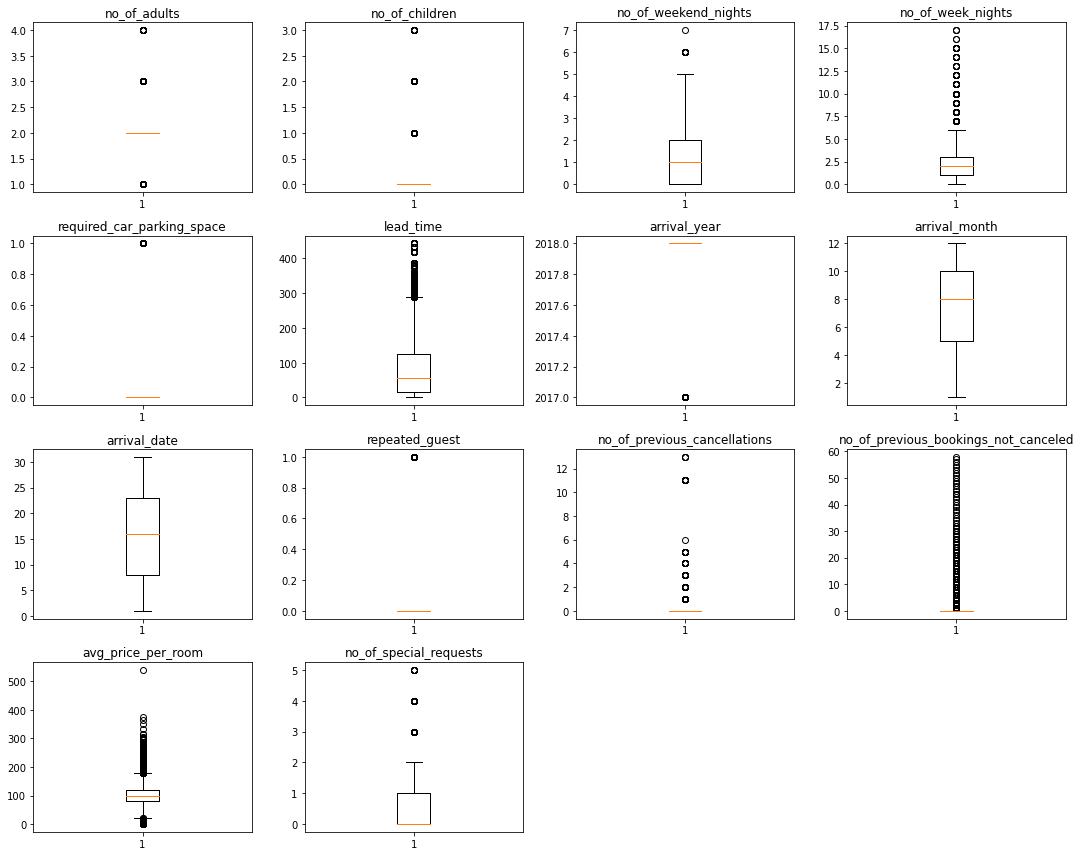

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [120]:
# outlier detection using boxplot
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()
# dropping booking_status
numeric_columns.remove("booking_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* Most of the columns are discrete and the outliers could be valid data.
* avg_price_per_room shows lots of values above 200 but there is one that goes above 400 euros. We'll try to treat this record so our model is not impacted by extreme values. 

In [121]:
# Calculating the 25th quantile
Q1 = df1["avg_price_per_room"].quantile(0.25)
# Calculating the 75th quantile
Q3 = df1["avg_price_per_room"].quantile(0.75)
# Calculating IQR
IQR = Q3 - Q1
# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.175

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [122]:
# assigning the outliers the value of upper whisker
df1.loc[df1["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## EDA

- It is a good idea to explore the data once again after manipulating it.

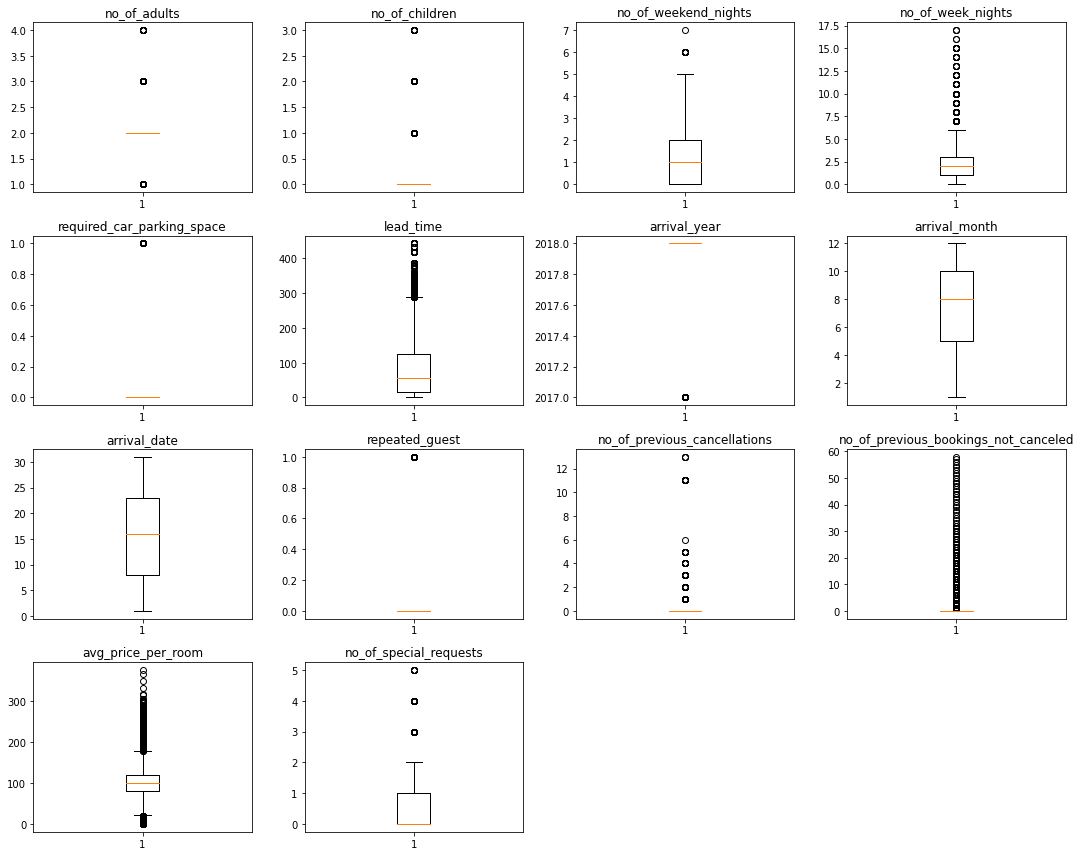

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [123]:
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

The data looks good after manipulation.

### Data Preparation for modeling

- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

### Let's look at the distribution of target variable

In [124]:
df1["booking_status"].value_counts(1)

0    0.671713
1    0.328287
Name: booking_status, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

There are 67% bookings within the dataset that are Not Canceled (1) and 33% are Canceled.

In [125]:
X = df1.drop(["booking_status"], axis=1)
Y = df1["booking_status"]

# adding a contstant to X variable
X = add_constant(X)

# creating dummies
X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1, stratify=Y)

#The Stratify argument maintains the original distribution of classes in the target variable while splitting the data into train and test sets.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [126]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25337, 28)
Shape of test set :  (10860, 28)
Percentage of classes in training set:
0    0.671705
1    0.328295
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.671731
1    0.328269
Name: booking_status, dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Building a Logistic Regression model

#### Fitting Logistic Regression model

In [127]:
# fitting the model on training set
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit()

         Current function value: 0.454251
         Iterations: 35


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [128]:
# let's print the logistic regression summary
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25337
Model:                          Logit   Df Residuals:                    25309
Method:                           MLE   Df Model:                           27
Date:                Fri, 13 May 2022   Pseudo R-squ.:                  0.2823
Time:                        11:33:36   Log-Likelihood:                -11509.
converged:                      False   LL-Null:                       -16037.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -922.1509    121.082     -7.616      0.000   -1159.468    -684.834
no_of_adults                             0.0366      

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* The coefficients of the logistic regression model are in terms of log(odd).
* `P>|z|`: The interpretation of p-values is similar to that in Linear Regression.

### Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting a booking will be canceled but in reality it is not canceled.  
2. Predicting a booking will not be canceled, but in reality it gets canceled. 

### Which case is more important? 
* Both the cases are important as: 

* If we predict a booking will not be canceled and it gets canceled, the hotel will lose money and resources. 

* If we predict a bookings will be canceled, but in reality it doesn't, the hotel will may not be able to make enough prior arrangements to serve the customer better which will have an impact on brand and future bookings. 


### How to reduce the losses?
*  `f1_score` should be maximized, the greater the f1_score higher the chances of identifying both the classes correctly. 

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models. 
* The confusion_matrix_statsmodels function will be used to plot confusion matrix.

In [129]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [130]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Model performance evaluation

In [131]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.801397,0.637413,0.724515,0.678179


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Observations**

- Negative values of the coefficient shows that the probability of a booking being canceled decreases with the increase of corresponding attribute value.

- Positive values of the coefficient show that the probability of a booking being canceled increases with the increase of corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

- But these variables might contain multicollinearity, which will affect the p-values.

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values.

* There are different ways of detecting (or testing) multi-collinearity, one such way is the Variation Inflation Factor.
* All above scores show that the model performs well on the training data

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [132]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [133]:
checking_vif(X_train)

,feature,VIF
0,const,3.943722e+07
1,no_of_adults,1.341254e+00
2,no_of_children,2.047535e+00
3,no_of_weekend_nights,1.069610e+00
4,no_of_week_nights,1.097436e+00
5,required_car_parking_space,1.036292e+00
6,lead_time,1.395214e+00
7,arrival_year,1.422641e+00
8,arrival_month,1.272625e+00
9,arrival_date,1.008078e+00


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

market_segment_type_Online, market_segment_type_Offline and market_segment_type_Corporate have high VIF. But we'd like to keep them at this point since they look important for prediction. We'll see further down in model building process if they are important features. 

### Dropping high p-value variables

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [134]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [135]:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [136]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit()
print(lg1.summary())

Optimization terminated successfully.
         Current function value: 0.422363
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25337
Model:                          Logit   Df Residuals:                    25316
Method:                           MLE   Df Model:                           20
Date:                Fri, 13 May 2022   Pseudo R-squ.:                  0.3327
Time:                        11:34:26   Log-Likelihood:                -10701.
converged:                       True   LL-Null:                       -16037.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -907.3426    121.241     -7.484    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Now there are no features with p value greater than 0.05. Let's check performance of the model on training data**

In [137]:
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg1, X_train1, y_train
)
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.808975,0.636211,0.744723,0.686203


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

There is not much impact on the performance of the model.

### Coefficient interpretations

* Coefficient of required_car_parking_space, arrival_month,repeated_guest, no_of_special_requests, market_segment_type_Offline, market_segment_type_Offline and all room types are negative. An increase in these will lead to decrease in chances of a booking being cancelled.

* Coefficient of no_of_children, no_of_weekend_nights,no_of_week_nights, lead_time, arrival_year, no_of_previous_cancellations, avg_price_per_room are positive. An increase in these will lead to increase in chances of a booking being cancelled.

###  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [138]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

,const,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.0,1.144098,1.172487,1.028148,0.210446,1.016005,1.565708,0.958826,0.056793,1.297236,1.018559,0.221498,1.217013,1.307454,0.646324,0.831302,0.424331,0.396867,0.353877,0.409365,0.166420
Change_odd%,-100.0,14.409841,17.248712,2.814759,-78.955392,1.600504,56.570751,-4.117446,-94.320702,29.723602,1.855949,-77.850215,21.701320,30.745425,-35.367646,-16.869832,-57.566898,-60.313267,-64.612270,-59.063466,-83.358044


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Coefficient interpretations

* `no_of_children`: Holding all other features constant a 1 unit change in no_of_children will increase the odds of a booking being cancelled by 1.14 times or a 14% increase in the odds of a booking cancelled.
* `no_of_special_requests`: Holding all other features constant a 1 unit change in the no_of_special_requests will decrease the odds of a booking being cancelled by 0.22 times or a decrease of 77% in odds of a booking being cancelled.

`Interpretation for other attributes can be done similarly.`

### Performance Metrics of the final model - 'lg1'

**Confusion Matrix on training set**

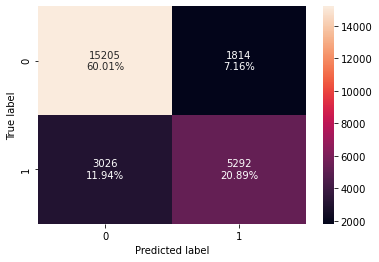

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [139]:
confusion_matrix_statsmodels(lg1, X_train1, y_train)

#### The confusion matrix

* True Positives (TP):  A booking has been **canceled** and the model predicted that the booking has been **canceled**.
* True Negatives (TN): A booking has **not been canceled** and the model predicted that the booking has **not been canceled**.
* False Positives (FP): A booking has been **canceled** and the model predicted that the booking has **not been canceled**.
* False Negatives (FN): A booking has **not been canceled** and the model predicted that the booking has **canceled**.

**Confusion Matrix on training set**

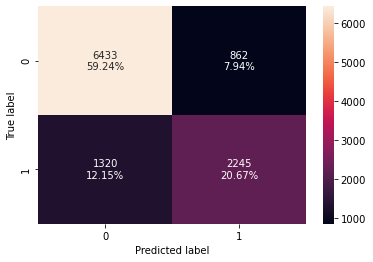

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [140]:
confusion_matrix_statsmodels(lg1, X_test1, y_test)

The TP, TN, FP, FN percentages are nearly same on test data. This indicates the model is not overfitting.

In [141]:
print("Testing performance:")
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg1, X_test1, y_test
)
log_reg_model_test_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.799079,0.629734,0.722562,0.672962


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### ROC-AUC
* ROC-AUC on test set

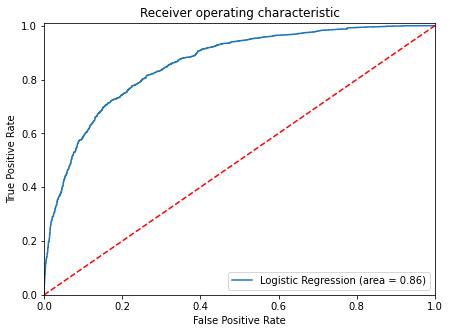

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [142]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Model is performing well on the testing set.

### Optimal threshold using AUC-ROC curve

In [143]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3189127362667157


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Using model with threshold=0.32**

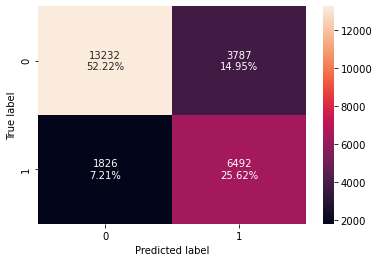

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [144]:
confusion_matrix_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)

The percentage of False Negatives have reduced from 12% to 7%. Let's check the performance of the model on test data with this threshold.

In [145]:
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.778466,0.780476,0.631579,0.698177


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

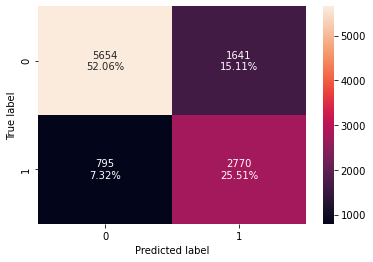

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [146]:
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc)

The percentage of False Negatives have reduced from 12% to 7%. Let's check the performance of the model on test data with this threshold.

In [147]:
print("Testing performance:")
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
log_reg_model_test_perf_threshold_auc_roc

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.775691,0.776999,0.627976,0.694584


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy is nearly the same, however recall and F1 score have increased, which is good. Precision has reduced from 0.72 to 0.62

#### Let's use Precision-Recall curve and see if we can find a better threshold

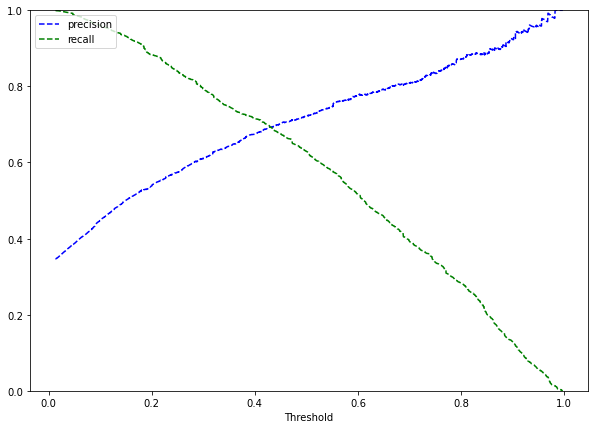

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [148]:
y_scores = lg1.predict(X_test1)
prec, rec, tre = precision_recall_curve(y_test, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.42, we get balanced recall and precision.

**Using model with threshold=0.42**

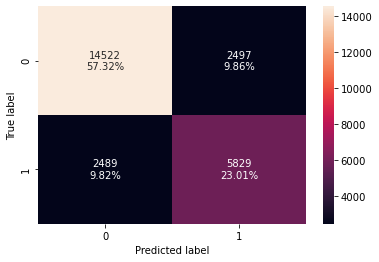

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [149]:
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold=0.42)

In [150]:
print("Training performance:")
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=0.42
)
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.803213,0.700769,0.700096,0.700433


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy is nearly the same, recall has reduced, F1 score has increased which is good. Precision has increased to 0.70 which is optimum.

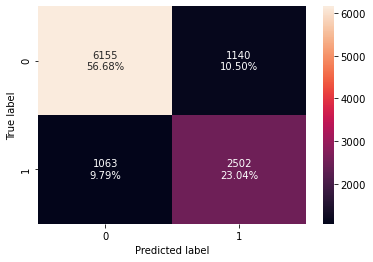

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [151]:
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=0.42)

The percentage of False Negatives have reduced from 12% to 7%. Let's check the performance of the model on test data with this threshold.

In [152]:
print("Testing performance:")
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=0.42
)
log_reg_model_test_perf_threshold_curve

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.797145,0.701823,0.686985,0.694325


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy is nearly the same, recall has reduced, F1 score has increased which is good. Precision has increased to 0.68 which is optimum.

In [153]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.32 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.32 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.808975,0.778466,0.803213
Recall,0.636211,0.780476,0.700769
Precision,0.744723,0.631579,0.700096
F1,0.686203,0.698177,0.700433


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [154]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.32 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.32 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.799079,0.775691,0.797145
Recall,0.629734,0.776999,0.701823
Precision,0.722562,0.627976,0.686985
F1,0.672962,0.694584,0.694325


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Final Model Summary

### Conclusion
* The training and testing set performance is nearly same for all three threshold values. The model with highest F1 score on the training can be a preferred model for predictions. 

* We have been able to build a predictive model that can be used by INN Hotels to predict booking cancellations in advance with an f1_score of 0.70 on the training set and formulate profitable policies for cancellations and refunds..

* Coefficient of required_car_parking_space, arrival_month,repeated_guest, no_of_special_requests, market_segment_type_Offline, market_segment_type_Offline and all room types are negative. An increase in these will lead to decrease in chances of a booking being cancelled.

* Coefficient of no_of_children, no_of_weekend_nights,no_of_week_nights, lead_time, arrival_year, no_of_previous_cancellations, avg_price_per_room and all room types are positive. An increase in these will lead to increase in chances of a booking being cancelled.

## Building a Decision Tree model

In [155]:
X = df1.drop(["booking_status"], axis=1)
Y = df1["booking_status"]

# creating dummies
X = pd.get_dummies(
    X,
    columns=[
        "required_car_parking_space",
        "type_of_meal_plan",
        "room_type_reserved",
        "market_segment_type",
    ],
    drop_first=True,
)

X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,required_car_parking_space_1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,224,2017,10,2,0,0,0,65.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,5,2018,11,6,0,0,0,106.68,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,1,2018,2,28,0,0,0,60.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,211,2018,5,20,0,0,0,100.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,48,2018,4,11,0,0,0,94.50,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [156]:
# Splitting data in train and test sets
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)

# The Stratify argument maintains the original distribution of classes in the target variable while splitting the data into train and test sets.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [157]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25337, 27)
Shape of test set :  (10860, 27)
Percentage of classes in training set:
0    0.671705
1    0.328295
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.671731
1    0.328269
Name: booking_status, dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting a booking will be canceled but in reality it is not canceled - Loss of brand equity.   
2. Predicting a booking will not be canceled, but in reality it gets canceled. - Loss of resources and revenue

### Which case is more important?

* If we predict a booking will not be canceled and it gets canceled, the hotel will lose money and resources.  


### How to reduce the losses?
* `recall` should be maximized, the greater the recall higher the chances of minimizing the false negatives.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The get_recall_score function will be used to check the model performance of models. 
* The make_confusion_matrix function will be used to plot confusion matrix.

In [158]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [159]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.15,1:0.85} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

## Build Decision Tree Model

In [160]:
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.15, 1: 0.85}, random_state=1
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [161]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Checking model performance on training set

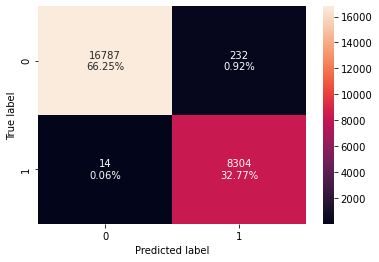

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [162]:
confusion_matrix_sklearn(model, X_train, y_train)

In [163]:
decision_tree_perf_train = get_recall_score(model, X_train, y_train)

print("Recall Score:", decision_tree_perf_train)

Recall Score: 0.9983169031017072


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* Model is able to perfectly classify almost all the data points on the training set.
* Negligible errors on the training set, each sample has been classified correctly.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

#### Checking model performance on test set

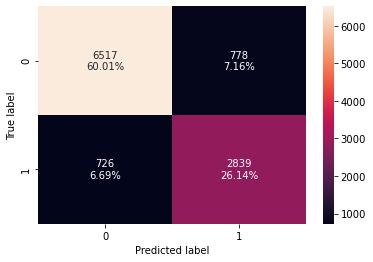

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [164]:
confusion_matrix_sklearn(model, X_test, y_test)

In [165]:
decision_tree_perf_test = get_recall_score(model, X_test, y_test)
print("Recall Score:", decision_tree_perf_test)

Recall Score: 0.7963534361851332


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* There is a some disparity in performance of model on training set and test set, which suggests that the model is overfiiting.

## Visualizing the Decision Tree

In [166]:
## creating a list of column names
feature_names = X_train.columns.to_list()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

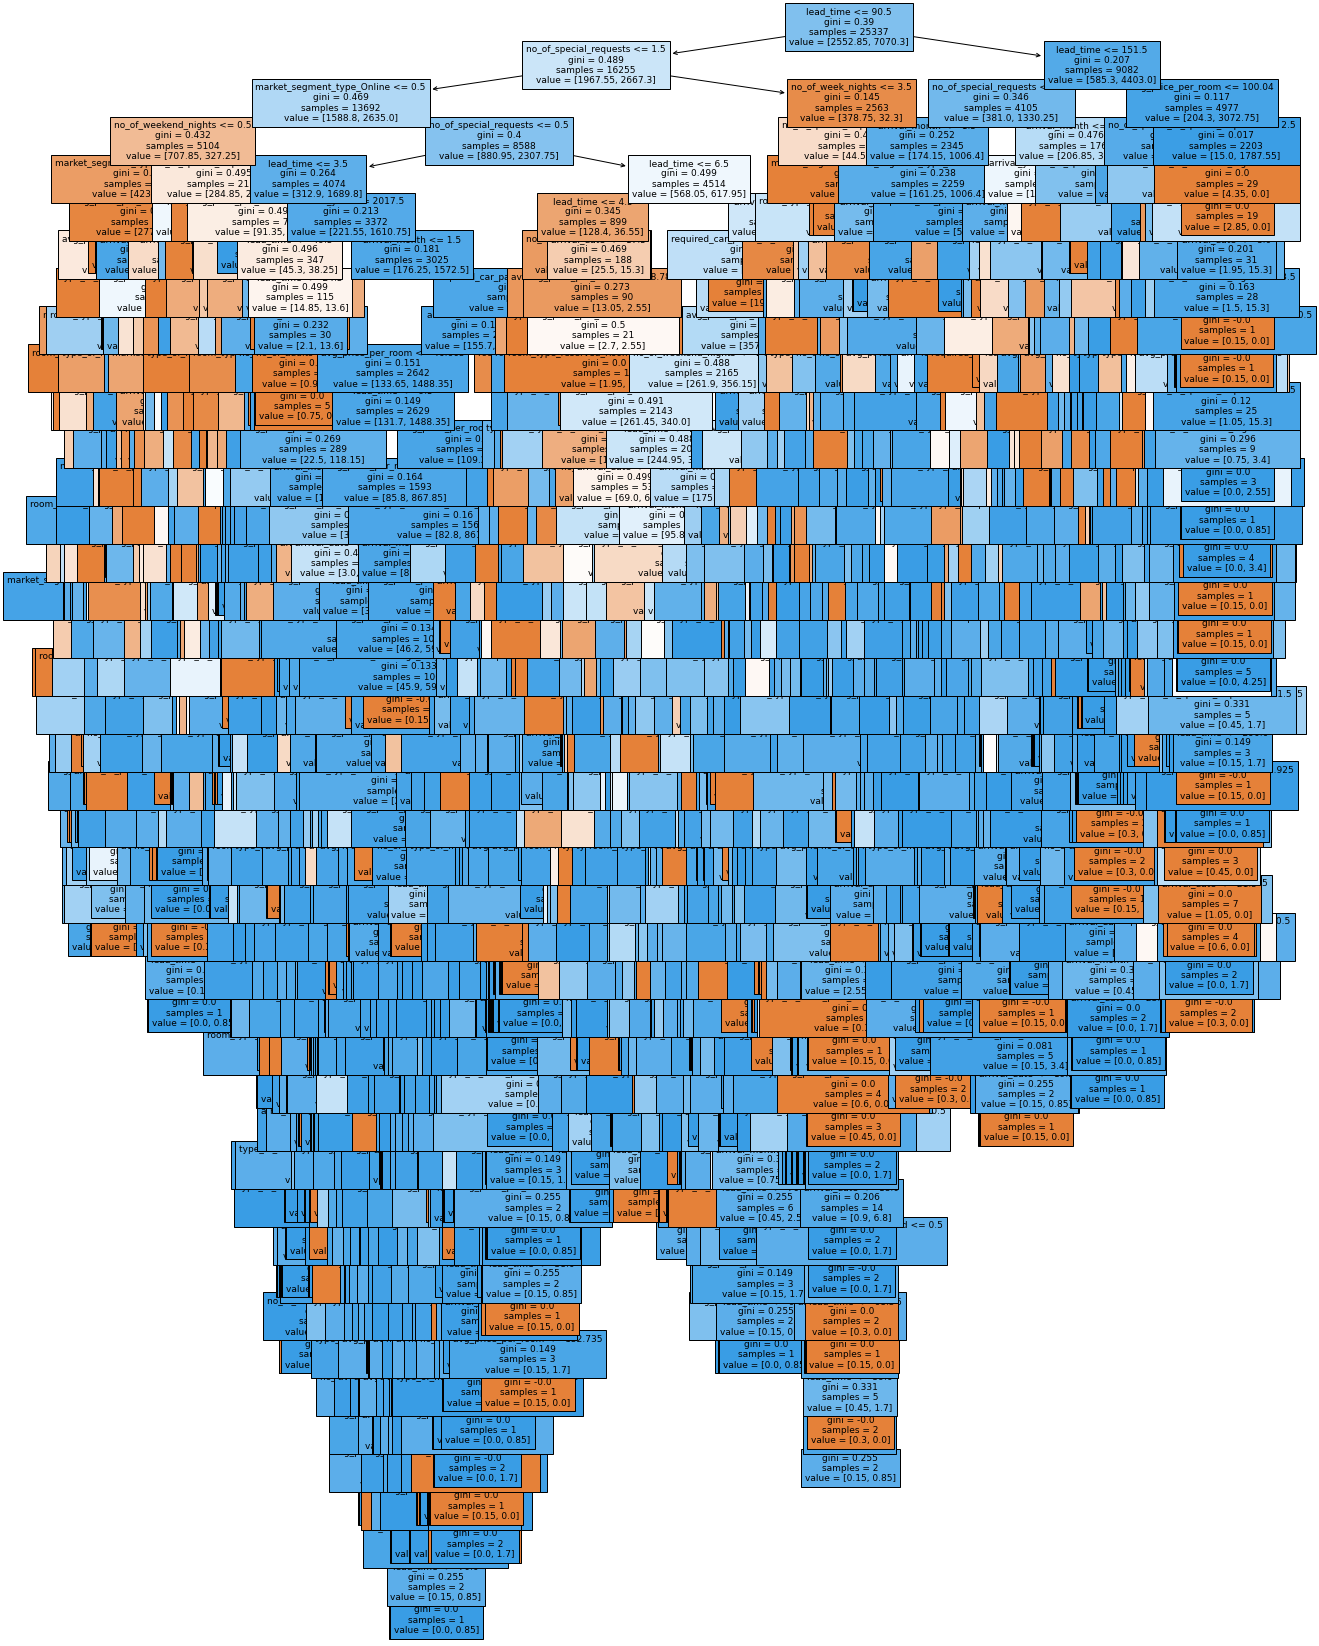

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [167]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [168]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 90.50
|   |--- no_of_special_requests <= 1.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |--- avg_price_per_room <= 87.85
|   |   |   |   |   |   |   |--- avg_price_per_room <= 52.50
|   |   |   |   |   |   |   |   |--- weights: [15.60, 0.00] class: 0
|   |   |   |   |   |   |   |--- avg_price_per_room >  52.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 80.50
|   |   |   |   |   |   |   |   |   |--- arrival_month <= 11.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_special_requests <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 14
|   |   |   |   |   |   |   |   |   |   |--- no_of_special_requests >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [4.20, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- arrival_m

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [169]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                           Imp
lead_time                             0.292673
no_of_special_requests                0.140958
avg_price_per_room                    0.136510
arrival_date                          0.089543
market_segment_type_Online            0.088957
arrival_month                         0.078795
no_of_week_nights                     0.047386
no_of_weekend_nights                  0.038290
no_of_adults                          0.020170
arrival_year                          0.014725
market_segment_type_Offline           0.009434
type_of_meal_plan_Not Selected        0.008518
required_car_parking_space_1          0.007606
room_type_reserved_Room_Type 4        0.007101
no_of_children                        0.004910
repeated_guest                        0.004469
type_of_meal_plan_Meal Plan 2         0.002777
room_type_reserved_Room_Type 2        0.002601
market_segment_type_Corporate         0.001534
room_type_reserved_Room_Type 5        0.000935
room_type_res

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

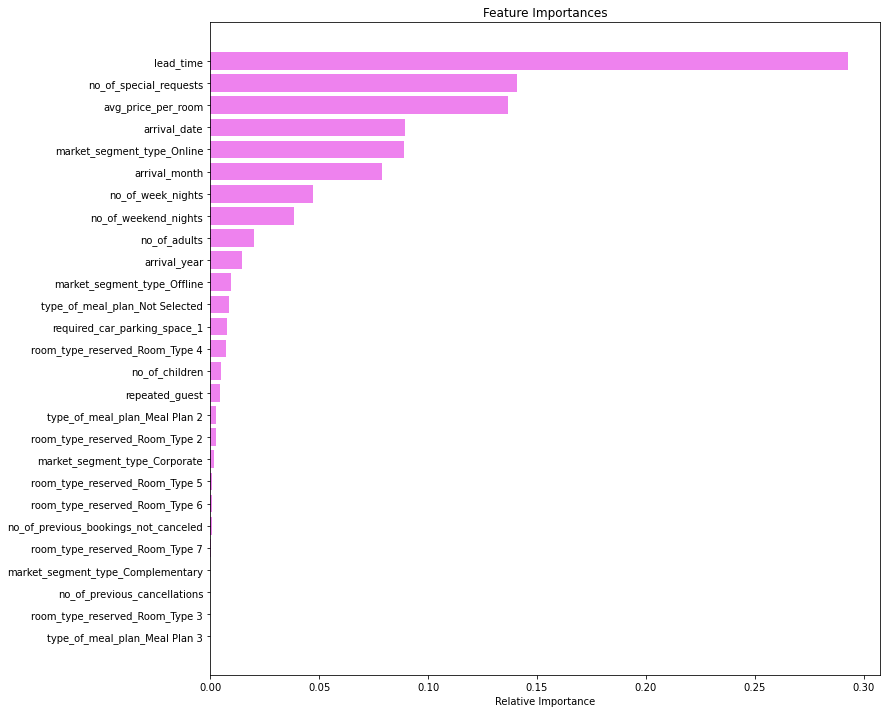

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [170]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* According to the decision tree model, lead_time is the most important variable for predicting cancellations.

## Do we need to prune the tree?

Our decision tree is currently capturing all the data points in the training set. It is suffering from Overfitting. The tree needs to be pruned. 

### Reducing over fitting by pre-pruning

In [171]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=70, random_state=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Checking performance on training set

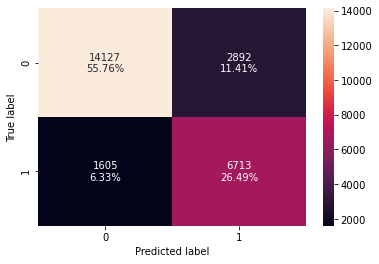

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [172]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [173]:
decision_tree_tune_perf_train = get_recall_score(estimator, X_train, y_train)
print("Recall Score:", decision_tree_tune_perf_train)

Recall Score: 0.8070449627314258


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Checking performance on testing set

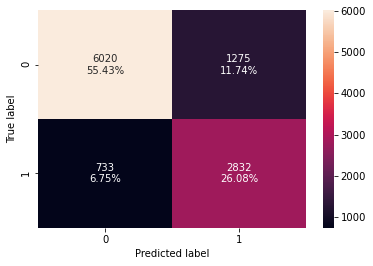

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [174]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [175]:
decision_tree_tune_perf_test = get_recall_score(estimator, X_test, y_test)
print("Recall Score:", decision_tree_tune_perf_test)

Recall Score: 0.794389901823282


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The model is giving a good performance on both train and test set. The recall score is high. Only 2% data is false negative.

## Visualizing the Decision Tree

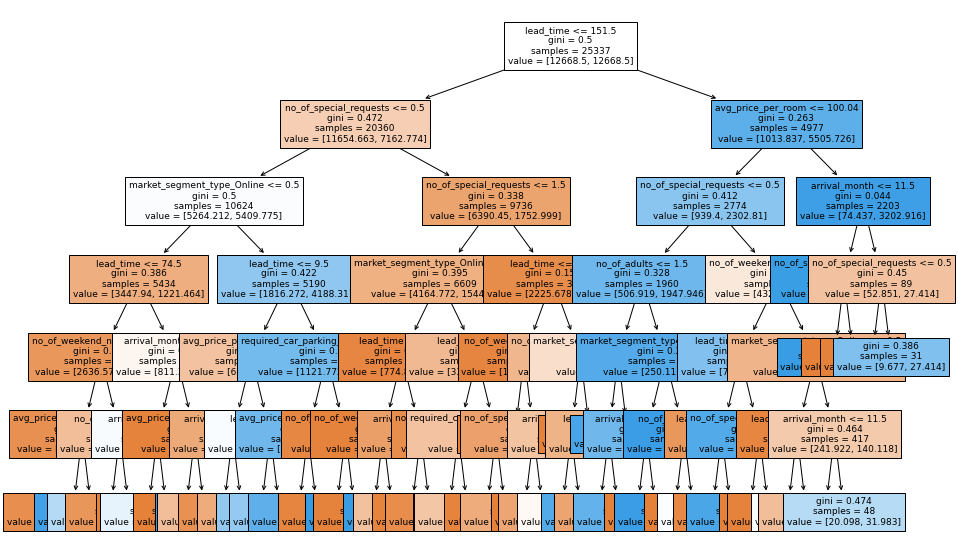

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [176]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [177]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 74.50
|   |   |   |   |--- no_of_weekend_nights <= 1.50
|   |   |   |   |   |--- avg_price_per_room <= 202.00
|   |   |   |   |   |   |--- weights: [2225.68, 255.87] class: 0
|   |   |   |   |   |--- avg_price_per_room >  202.00
|   |   |   |   |   |   |--- weights: [0.74, 16.75] class: 1
|   |   |   |   |--- no_of_weekend_nights >  1.50
|   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |--- weights: [90.07, 144.69] class: 1
|   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |--- weights: [320.08, 53.31] class: 0
|   |   |   |--- lead_time >  74.50
|   |   |   |   |--- arrival_month <= 11.50
|   |   |   |   |   |--- arrival_month <= 1.50
|   |   |   |   |   |   |--- weights: [64.76, 0.00] class: 0
|   |   |   |   |   |--- arrival_month >  1.50
|   |   |   |   |   |   |--- weights: [656.54, 749.33] class: 1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Observations from the tree:**

Using the above extracted decision rules we can make interpretations from the decision tree model like:

* If the lead time is less than 151 days and there are no special requests with the booking and market segment is not online, 
    * lead time is further less than 74 days and number of weekend nights is less than 1 and 
       * average price per room is less than 202 euros , then the customer is likely **not to cancel the booking**
       * average price per room is greater than 202 euros , then the customer is likely **to cancel the booking**
    

`Interpretations from other decision rules can be made similarly`

In [179]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                                           Imp
lead_time                             0.458662
market_segment_type_Online            0.193858
no_of_special_requests                0.180219
avg_price_per_room                    0.055767
arrival_month                         0.039467
no_of_adults                          0.034051
no_of_weekend_nights                  0.018993
required_car_parking_space_1          0.013878
no_of_week_nights                     0.004061
arrival_date                          0.001046
room_type_reserved_Room_Type 3        0.000000
market_segment_type_Offline           0.000000
market_segment_type_Corporate         0.000000
market_segment_type_Complementary     0.000000
room_type_reserved_Room_Type 7        0.000000
room_type_reserved_Room_Type 6        0.000000
room_type_reserved_Room_Type 5        0.000000
room_type_reserved_Room_Type 4        0.000000
arrival_year                          0.000000
room_type_reserved_Room_Type 2        0.000000
type_of_meal_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

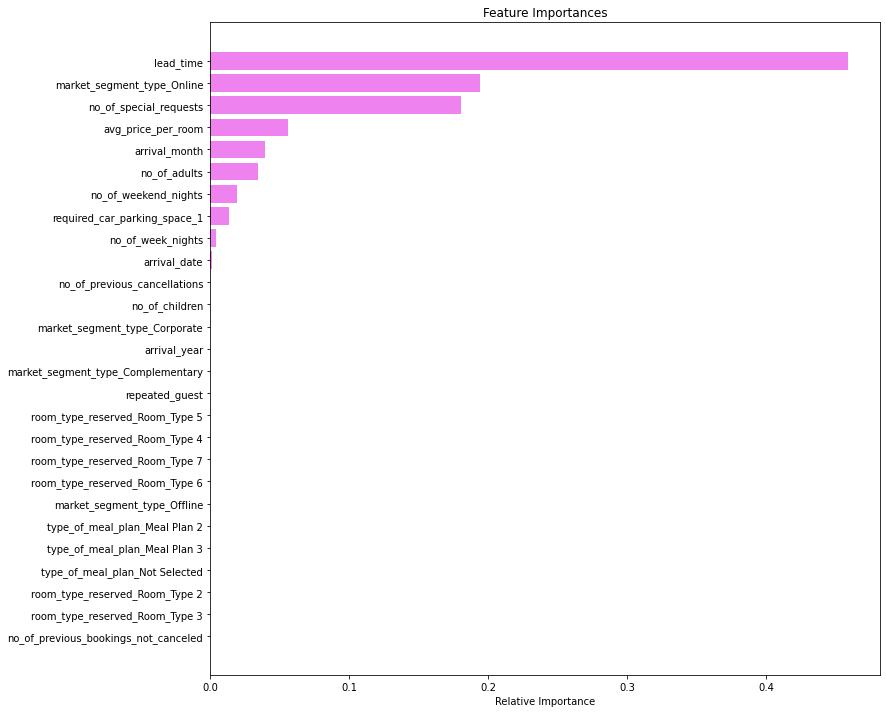

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [180]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* In tuned decision tree lead_time is the most important feature followed by market_segment_type_online.

**Cost Complexity Pruning**

In [181]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [182]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,0.008535
1,2.669447e-20,0.008535
2,2.710505e-20,0.008535
3,1.174218e-19,0.008535
4,1.174218e-19,0.008535
...,...,...
1529,8.891304e-03,0.325419
1530,9.173483e-03,0.334592
1531,1.277670e-02,0.347369
1532,3.519868e-02,0.417766


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

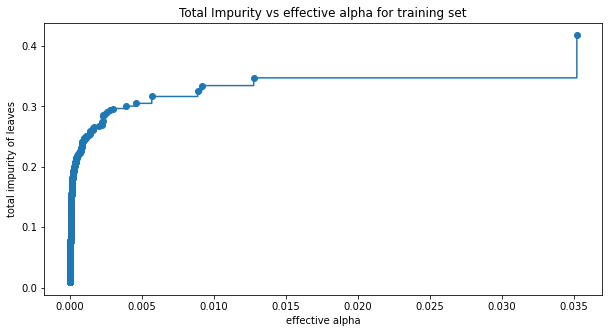

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [183]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [184]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08223353943250378


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

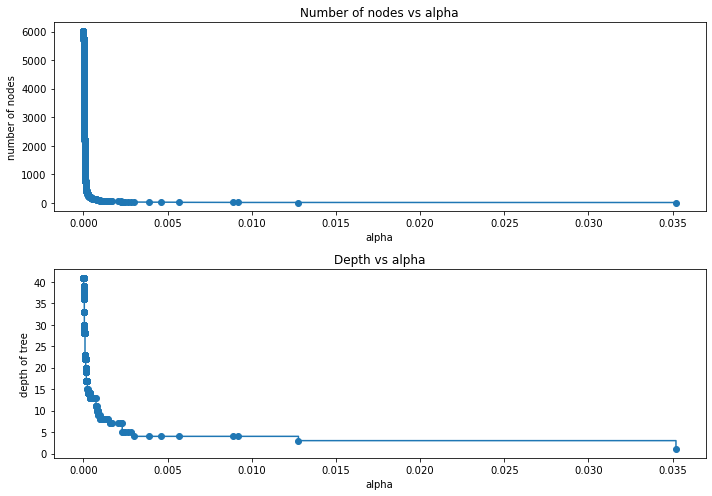

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [185]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### F1 score Vs Alpha

In [186]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

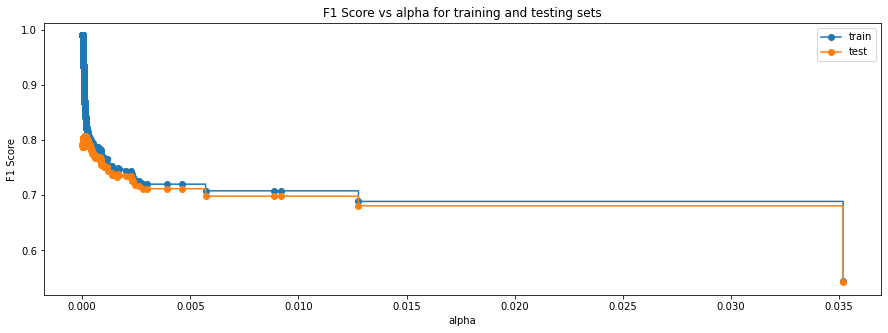

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [187]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [189]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0001238074201800893, class_weight='balanced',
                       random_state=1)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [190]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0001238074201800893, class_weight='balanced',
                       random_state=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### checking performance on training set

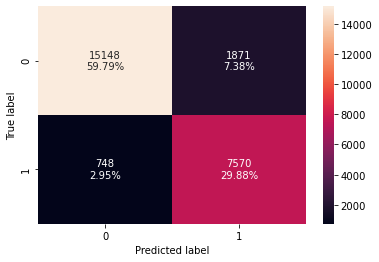

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [191]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [192]:
print("Recall Score:", get_recall_score(best_model, X_train, y_train))

Recall Score: 0.910074537148353


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### checking performance on testing set

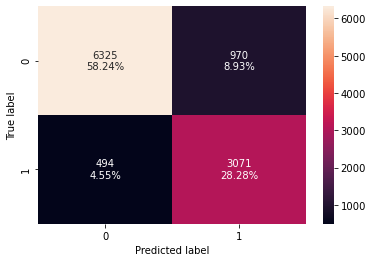

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [193]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [194]:
print("Recall Score:", get_recall_score(best_model, X_test, y_test))

Recall Score: 0.8614305750350632


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Visualizing the Decision Tree

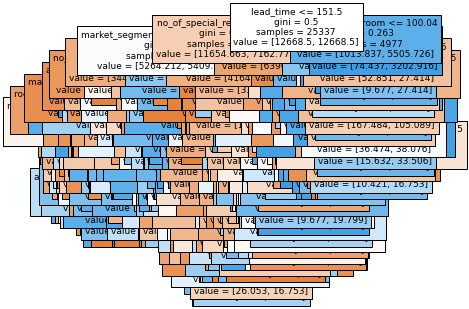

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [195]:
plt.figure(figsize=(5, 5))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

* This model might be giving the highest recall but a buisness would not be able to use it to actually target the potential cancellations.

**Creating model with 0.012 ccp_alpha**

In [196]:
best_model2 = DecisionTreeClassifier(
    ccp_alpha=0.012, class_weight={0: 0.15, 1: 0.85}, random_state=1
)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.012, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Checking performance on the training set

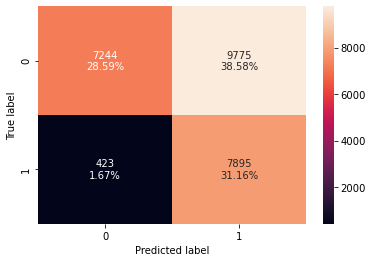

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [206]:
confusion_matrix_sklearn(best_model2, X_train, y_train)

In [207]:
decision_tree_postpruned_perf_train = get_recall_score(best_model2, X_train, y_train)
print("Recall Score:", decision_tree_postpruned_perf_train)

Recall Score: 0.9491464294301515


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Checking performance on the test set

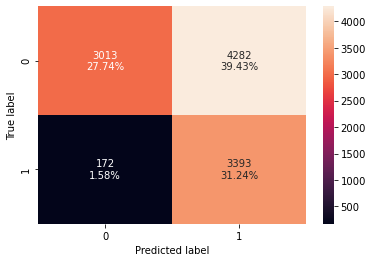

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [208]:
confusion_matrix_sklearn(best_model2, X_test, y_test)

In [209]:
decision_tree_postpruned_perf_test = get_recall_score(best_model2, X_test, y_test)
print("Recall Score:", decision_tree_postpruned_perf_test)

Recall Score: 0.9517531556802244


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* The results have improved from the initial model. 
* The model is giving a generalized performance on training and test set.

### Visualizing the Decision Tree

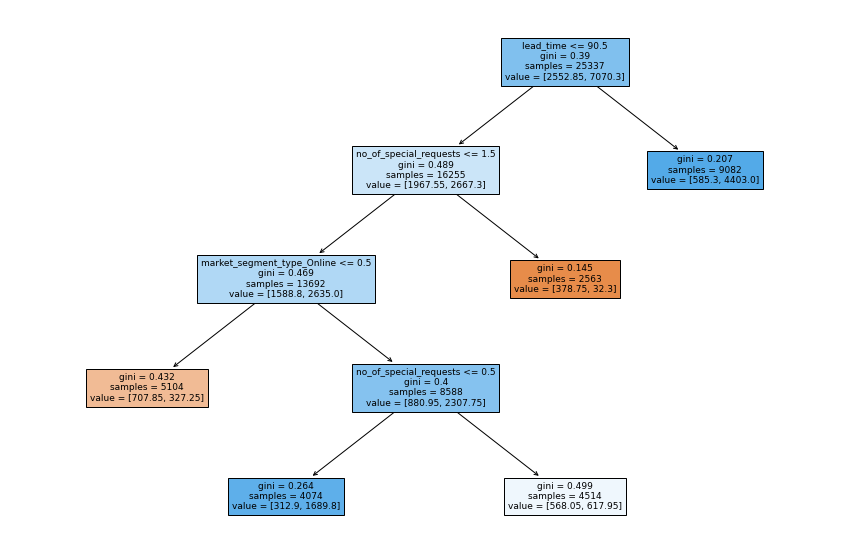

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [210]:
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [211]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model2, feature_names=feature_names, show_weights=True))

|--- lead_time <= 90.50
|   |--- no_of_special_requests <= 1.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- weights: [707.85, 327.25] class: 0
|   |   |--- market_segment_type_Online >  0.50
|   |   |   |--- no_of_special_requests <= 0.50
|   |   |   |   |--- weights: [312.90, 1689.80] class: 1
|   |   |   |--- no_of_special_requests >  0.50
|   |   |   |   |--- weights: [568.05, 617.95] class: 1
|   |--- no_of_special_requests >  1.50
|   |   |--- weights: [378.75, 32.30] class: 0
|--- lead_time >  90.50
|   |--- weights: [585.30, 4403.00] class: 1



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [212]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                           Imp
lead_time                             0.415610
no_of_special_requests                0.346409
market_segment_type_Online            0.237981
type_of_meal_plan_Meal Plan 3         0.000000
market_segment_type_Offline           0.000000
market_segment_type_Corporate         0.000000
market_segment_type_Complementary     0.000000
room_type_reserved_Room_Type 7        0.000000
room_type_reserved_Room_Type 6        0.000000
room_type_reserved_Room_Type 5        0.000000
room_type_reserved_Room_Type 4        0.000000
room_type_reserved_Room_Type 3        0.000000
room_type_reserved_Room_Type 2        0.000000
type_of_meal_plan_Not Selected        0.000000
no_of_adults                          0.000000
type_of_meal_plan_Meal Plan 2         0.000000
no_of_children                        0.000000
avg_price_per_room                    0.000000
no_of_previous_bookings_not_canceled  0.000000
no_of_previous_cancellations          0.000000
repeated_gues

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

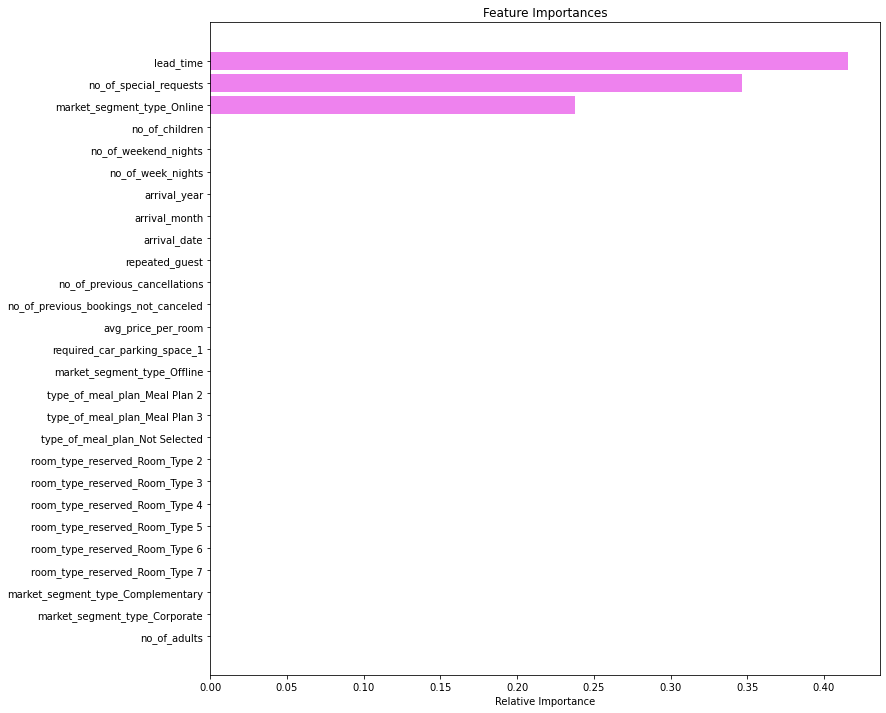

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [213]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Performance Comparison and Conclusions

### Comparing all the decision tree models

In [214]:
# training performance comparison

models_train_comp_df = pd.DataFrame(
    [
        decision_tree_perf_train,
        decision_tree_tune_perf_train,
        decision_tree_postpruned_perf_train,
    ],
    columns=["Recall on training set"],
)

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Recall on training set
0,0.998317
1,0.807045
2,0.949146


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [215]:
# testing performance comparison

models_test_comp_df = pd.DataFrame(
    [
        decision_tree_perf_test,
        decision_tree_tune_perf_test,
        decision_tree_postpruned_perf_test,
    ],
    columns=["Recall on testing set"],
)

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Recall on testing set
0,0.796353
1,0.794390
2,0.951753


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* Decision tree model with cost complexity pruning (decision_tree_postpruned_perf_test) has given the best recall score on training as well as testing data. However, the model has too few driving parameters which may not be sufficient to predict cancellations. 
* The hyperparameter tuned model (decision_tree_tune_perf_test) appears to have the most optimum performance.  

## Conclusions

**Logistic regression**
* We have been able to build a predictive model using Logistic Regression that can be used by INN Hotels to predict booking cancellations in advance with an f1_score of 0.70 on the training set and formulate profitable policies for cancellations and refunds..

* Coefficient of required_car_parking_space, arrival_month,repeated_guest, no_of_special_requests, market_segment_type_Offline, market_segment_type_Offline and all room types are negative. An increase in these will lead to decrease in chances of a booking being cancelled.

* Coefficient of no_of_children, no_of_weekend_nights,no_of_week_nights, lead_time, arrival_year, no_of_previous_cancellations, avg_price_per_room and all room types are positive. An increase in these will lead to increase in chances of a booking being cancelled.

**Decision Tree**
- We analyzed the "INN Hotels" booking dataset using different techniques and used Decision Tree Classifier to build a predictive model for future booking cancelations.
- The model built can be used to predict whether a booking will be canceled or not at some point after the room is reserved. 
- lead_time, no_of_special_requests, market_segment and avg_price_per_room are the most important variable in predicting if the booking will get canceled.
- We established the importance of hyper-parameters/ pruning to reduce overfitting.

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

## Recommendations

- Overall we can infer from the hyperparameter tuned prediction model that 
    -if the lead time is more than ~100 days in advance, and 
    - online bookings with no special requests, 
    - and if they are just for 1 or 2 weekend nights 
    - with 1 adult having a booking with average room price higher than 200 euros , they are likely to get cancelled. 

As generic policies
- Have different cancellation and refund windows based on lead time, since the parameter has a high influence on cancellations, i.e. where booking is more than 100 days in advance, the customer must confirm atleast 20 days prior to the arrival date to get a full refund, before 10 days to get a partial refund, and no refund thereafter.
- For lead time less than 100 days, if it is a no pre-payment booking, hotel can have a generic cancellation policy where the booking must be confirmed and paid in full n days (say 15 days) before the arrival date, else it will be cancelled automatically and give the hotel enough time to resell the room via different segments. 
- If it is a paid booking, INN hotels can put a lead time by which the customer can cancel and get a full refund (say 15 days before arrival date), a time by which customer can claim partial refund (say 15-10 days before arrival) and no refund thereafter. 
- For those customers with no previous cancellation, the hotel must capture feedback and continue to improve or enhance customer experience to keep them as returning customers (provide tiered benefit membership cards say gold or silver customer with complimentary/discounted stays or local tours once in a while). Similar strategies can be applied to convert new customers to returning customer.

For bookings that are predicted as cancelled by the model
- The hotel can actively reach out to the customer and follow up on confirmation. 
- Generate a dynamic cancellation and refund policy during booking, for bookings that are predicted as likely to be cancelled based on the parameters entered by customer at run time. 
- Optimise the average price per room for online channel by running seasonal promotions (say a fixed or percentage discounts for n number of days of booking) to reduce liklihood of cancelation. 

